# Regression with Controls

First we aggregate the data into a single dataframe across the two cities

In [2]:
import pandas as pd

barcelona_control = pd.read_csv('/content/Barcelona_before.csv')
barcelona_treatment = pd.read_csv('/content/Barcelona_Festival.csv')
alicante_control = pd.read_csv('/content/Alicante_before.csv')
alicante_treatment = pd.read_csv('/content/Alicante_festival.csv')

alicante_control['Treatment_City'] = 0
alicante_control['Treatment_Period'] = 0

alicante_treatment['Treatment_City'] = 0
alicante_treatment['Treatment_Period'] = 1

barcelona_control['Treatment_City'] = 1
barcelona_control['Treatment_Period'] = 0

barcelona_treatment['Treatment_City'] = 1
barcelona_treatment['Treatment_Period'] = 1

data = pd.concat([barcelona_control, barcelona_treatment, alicante_control, alicante_treatment], axis = 0)

data

,Unnamed: 0,Hotel Name,Rating,Price,Hotel URL,Descriptions,Treatment_City,Treatment_Period
0,0,Room Mate Gerard,"8,8",€ 987,https://www.booking.com/hotel/es/room-mate-ger...,El Room Mate Gerard en Barcelona ofrece alojam...,1,0
1,1,Hotel Arts Barcelona,"8,4",€ 3.037,https://www.booking.com/hotel/es/arts-barcelon...,Este hotel de diseño tiene vistas a la playa d...,1,0
2,2,Hostal la Palmera,"8,6",€ 455,https://www.booking.com/hotel/es/hostal-la-pal...,"Este hostal, de ambiente tranquilo, está situa...",1,0
3,3,Hotel Sansi Barcelona,"8,0",€ 702,https://www.booking.com/hotel/es/sansi-barcelo...,Hotel Sansi Barcelona está muy bien situado en...,1,0
4,4,Hotel Alimara,"8,3",€ 454,https://www.booking.com/hotel/es/hotelalimara....,El Hotel Alimara es moderno y está ubicado en ...,1,0
...,...,...,...,...,...,...,...,...
871,871,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,"6,2",€ 1.440,https://www.booking.com/hotel/es/otlichnaia-ui...,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,0,1
872,872,Large rural house with pool and barbecue,"8,0",€ 2.742,https://www.booking.com/hotel/es/large-rural-h...,Large rural house with pool and barbecue tiene...,0,1
873,873,The Market Hostel,"8,6",€ 193,https://www.booking.com/hotel/es/the-market-ho...,The Market Hostel está a menos de 1 km de Play...,0,1
874,874,Victoria Hospedaje,"9,0",€ 280,https://www.booking.com/hotel/es/victoria-alic...,"Victoria Hospedaje se encuentra en Alicante, c...",0,1


There are some descriptions in the dataset that are in english, and we want them all to be spanish, so we use this function to translate the english ones to spanish

In [3]:
#!pip install langdetect
#!pip install googletrans==4.0.0-rc1

# Detect which language the description is in
from langdetect import detect
data['language'] = data['Descriptions'].apply(lambda x: detect(x) if type(x) == str else None)
data

# Count total descriptions in Spanish and in English
english_count = data[data['language'] == 'en'].shape[0]
spanish_count = data[data['language'] == 'es'].shape[0]
print(f'Number of descriptions in English: {english_count}')
print(f'Number of descriptions in Spanish: {spanish_count}')

# Display the rows where the language is English
english_rows = data[data['language'] == 'en']
print(english_rows)

from googletrans import Translator

# Translate to Spanish
def translate_to_spanish(text):
    translator = Translator()
    translation = translator.translate(text, src='en', dest='es')
    return translation.text

english_descriptions = data[data['language'] == 'en']['Descriptions']

# Translate English descriptions to Spanish
data.loc[data['language'] == 'en', 'Descriptions'] = english_descriptions.apply(translate_to_spanish)

print(data)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=d003f4103b5a065f05b7db234b1bbf6add477b3f80256deff9ef720fe0039880
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 k

Number of descriptions in English: 17
Number of descriptions in Spanish: 3751
     Unnamed: 0                         Hotel Name Rating    Price  \
220         220       Àmfores Boutique Guest House    8,1    € 766   
287         287        Aparthotel Arai 4* Superior    9,0  € 1.489   
303         303   Torre Melina, a Gran Meliá Hotel    NaN  € 2.215   
332         332          Twentytu Hostel Barcelona    7,7  € 2.353   
573         573             Sonder La Casa del Sol    7,9  € 1.145   
619         619   DO Plaça Reial powered by Sonder    8,4  € 1.636   
626         626              TOC Hotel Las Ramblas    8,3  € 1.205   
150         150        Aparthotel Arai 4* Superior    9,0  € 1.455   
160         160   Torre Melina, a Gran Meliá Hotel    NaN  € 1.995   
288         288       Àmfores Boutique Guest House    8,1    € 926   
410         410             Sonder La Casa del Sol    7,9  € 1.126   
461         461              TOC Hotel Las Ramblas    8,3  € 1.354   
469         

We have chosen to use amenities and location-related words to add as controls for the model. We use an TFIDF matrix to find those words that are both unique and related to amenities and location. We remove stopwords and perform n-gramming before printing the list.

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

data['Description'] = data['Descriptions'].fillna('')
data['Descriptions'] = data['Descriptions'].astype(str)

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nltk.download('stopwords')

spanish_stopwords = stopwords.words('spanish')

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=spanish_stopwords, ngram_range=(1,1))

# Fit and transform the processed descriptions to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Descriptions'])

# Get the feature names
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sum the TF-IDF scores for each term across all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Sort indices in descending order of TF-IDF scores
sorted_indices = np.argsort(sum_tfidf).flatten()[::-1]

# Get the top 500 words and their scores
top_500_words = feature_names[sorted_indices[:500]]
top_500_scores = np.array(sum_tfidf)[0, sorted_indices[:500]]

# Print the top 100 words with their TF-IDF scores
for word, score in zip(top_500_words, top_500_scores):
    print(f"{word}")

# Ensure that the data extracted is 1-dimensional
top_500_words = feature_names[sorted_indices[:500]].flatten()
top_500_scores = np.array(sum_tfidf)[0, sorted_indices[:500]].flatten()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['bitérmica' 'jugando' 'hectáreas' ... 'alojamiento' 'km' 'alicante']


In [5]:
top_500_words

array(['bitérmica', 'jugando', 'hectáreas', ..., 'alojamiento', 'km',
       'alicante'], dtype=object)

The plot below implies that none of the words is much more unique than the other top words. Instead, the plot is quite uniform. This is good as it means we get a nice subset of words related to amenity and location that are all informative to a similar extent.

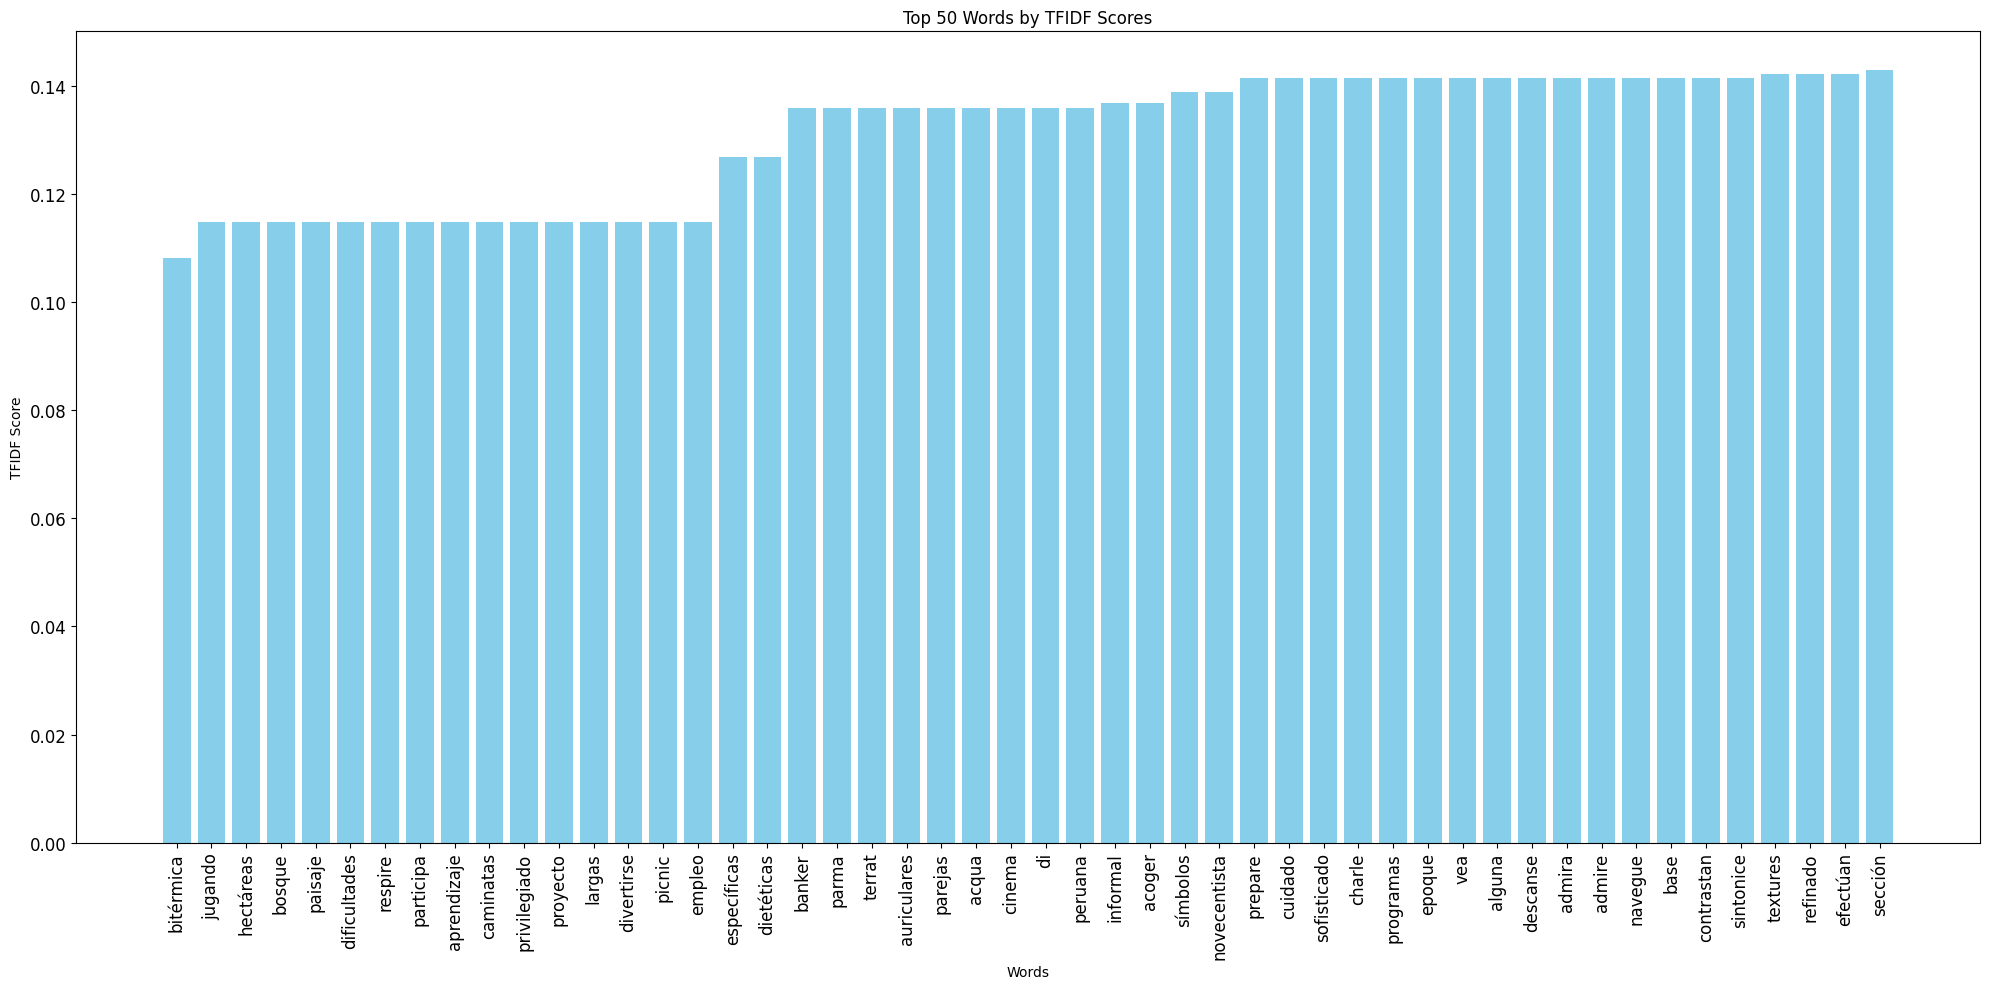

In [6]:
#Now we plot the top words in the TFIDF matrix by their score

import matplotlib.pyplot as plt
import pandas as pd

top_df = pd.DataFrame({'word': top_500_words, 'tfidf score': top_500_scores})

top_500_df = top_df[:500]

top_50_df = top_500_df[:50]

# Proceed to plot
plt.figure(figsize=(20, 10))  # Adjust figure size for better visibility
plt.bar(top_50_df['word'], top_50_df['tfidf score'], color='skyblue')

plt.ylabel('TFIDF Score')
plt.xlabel('Words')
plt.title('Top 50 Words by TFIDF Scores')

# Rotate the x labels to fit them better and set font size to small
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()

In [16]:
top_500_df_words = top_500_df['word']

top_500_df_words.to_csv('words_1')

In [15]:
top_500_df

,word,tfidf score
0,bitérmica,0.108126
1,jugando,0.114750
2,hectáreas,0.114750
3,bosque,0.114750
4,paisaje,0.114750
...,...,...
495,gastón,0.252923
496,82,0.253433
497,besalú,0.253433
498,olímpic,0.253758


Now we pick out the words from the top 500 that relate to amenities and location. We have been quite generous with inclusion criteria as we don't want too much researcher judgement to interfere with the results

In [17]:
# Select words from the top 500 ITFDF scores related to amenities and location:
amenities = [
    "bitérmica",
    "auriculares",
    "acqua",
    "cinema",
    "fumadores",
    "pizzas",
    "cocinilla",
    "cabina",
    "supervisados",
    "terapeutas",
    "escúteres",
    "cancha",
    "lobby",
    "gel",
    "champú",
    "aparcamientos",
    "armarios",
    "limpias",
    "toallero",
    "colchoneta",
    "secadores",
    "kitchen",
    "aseos",
    "intolerancias",
    "equipajes",
    "cocheras",
    "garaje",
    "infinito",
    "bolera",
    "piscine",
]

location_itfdf = [
     "bosque",
     "paisaje",
    "privilegiado",
    "circundantes",
    "proximidad",
    "naturaleza",
    "montseny",
    "berceloneta",
    "pirineos"
]

Now we find the top words across all documents. While these words are less informative about a single document than the TFIDF matrix because they are used widely across the dataset, their absence may also be a useful indicator.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'data' is your DataFrame and 'Descriptions' is the column with hotel descriptions

# Step 1: Initialize CountVectorizer
# We don't set max_features=500 here because we first want to create the full document frequency matrix
vectorizer = CountVectorizer(analyzer='word', stop_words=spanish_stopwords, ngram_range=(1,1))

# Step 2: Fit the vectorizer to the 'Descriptions' and transform the text to a document frequency matrix
X = vectorizer.fit_transform(data['Descriptions'])

# Step 3: Sum the occurrence of each word across all documents to find the most used words
word_counts = X.sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Step 4: Sort the words by their frequency
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

pd.DataFrame(words_freq)

# Step 5: Extract the top 500 words
top_500_words_docfreq = words_freq[:500]

# Convert the list of tuples into two lists: one for words and another for their corresponding frequencies
words_freq_df = pd.DataFrame(words_freq)

# Now `top_500_words_list` contains the top 500 most used words in the 'Descriptions' column
print(top_500_words_docfreq)


[('km', 7917), ('alojamiento', 6512), ('alicante', 6261), ('aeropuerto', 5503), ('ofrece', 4521), ('apartamento', 4428), ('barcelona', 4131), ('pie', 3735), ('aire', 3387), ('wifi', 3089), ('acondicionado', 2958), ('estación', 2865), ('cocina', 2749), ('tv', 2577), ('playa', 2503), ('minutos', 2442), ('gratis', 2390), ('baño', 2286), ('encuentra', 2265), ('habitaciones', 2215), ('hotel', 2144), ('cerca', 1955), ('metros', 1889), ('pantalla', 1819), ('plana', 1806), ('cama', 1763), ('nevera', 1760), ('vistas', 1726), ('terraza', 1720), ('interés', 1698), ('zona', 1691), ('min', 1675), ('tren', 1663), ('ropa', 1662), ('cercano', 1647), ('equipada', 1634), ('toallas', 1623), ('centro', 1588), ('privado', 1578), ('ducha', 1506), ('puntos', 1500), ('elche', 1490), ('miguel', 1489), ('hernández', 1488), ('metro', 1479), ('cuenta', 1407), ('plaza', 1393), ('museo', 1336), ('dispone', 1323), ('san', 1310), ('gratuita', 1307), ('ciudad', 1304), ('postiguet', 1278), ('dormitorios', 1254), ('tota

The plot below shows the words are distributed according to a Zipfian distribution as we would expect with natural language. Some words are really uninformative, like 'km' which is mentioned in nearly every document. However, most of the words are only mentioned in < 2000 documents, so are actually quite informative for subsetting the hotels.

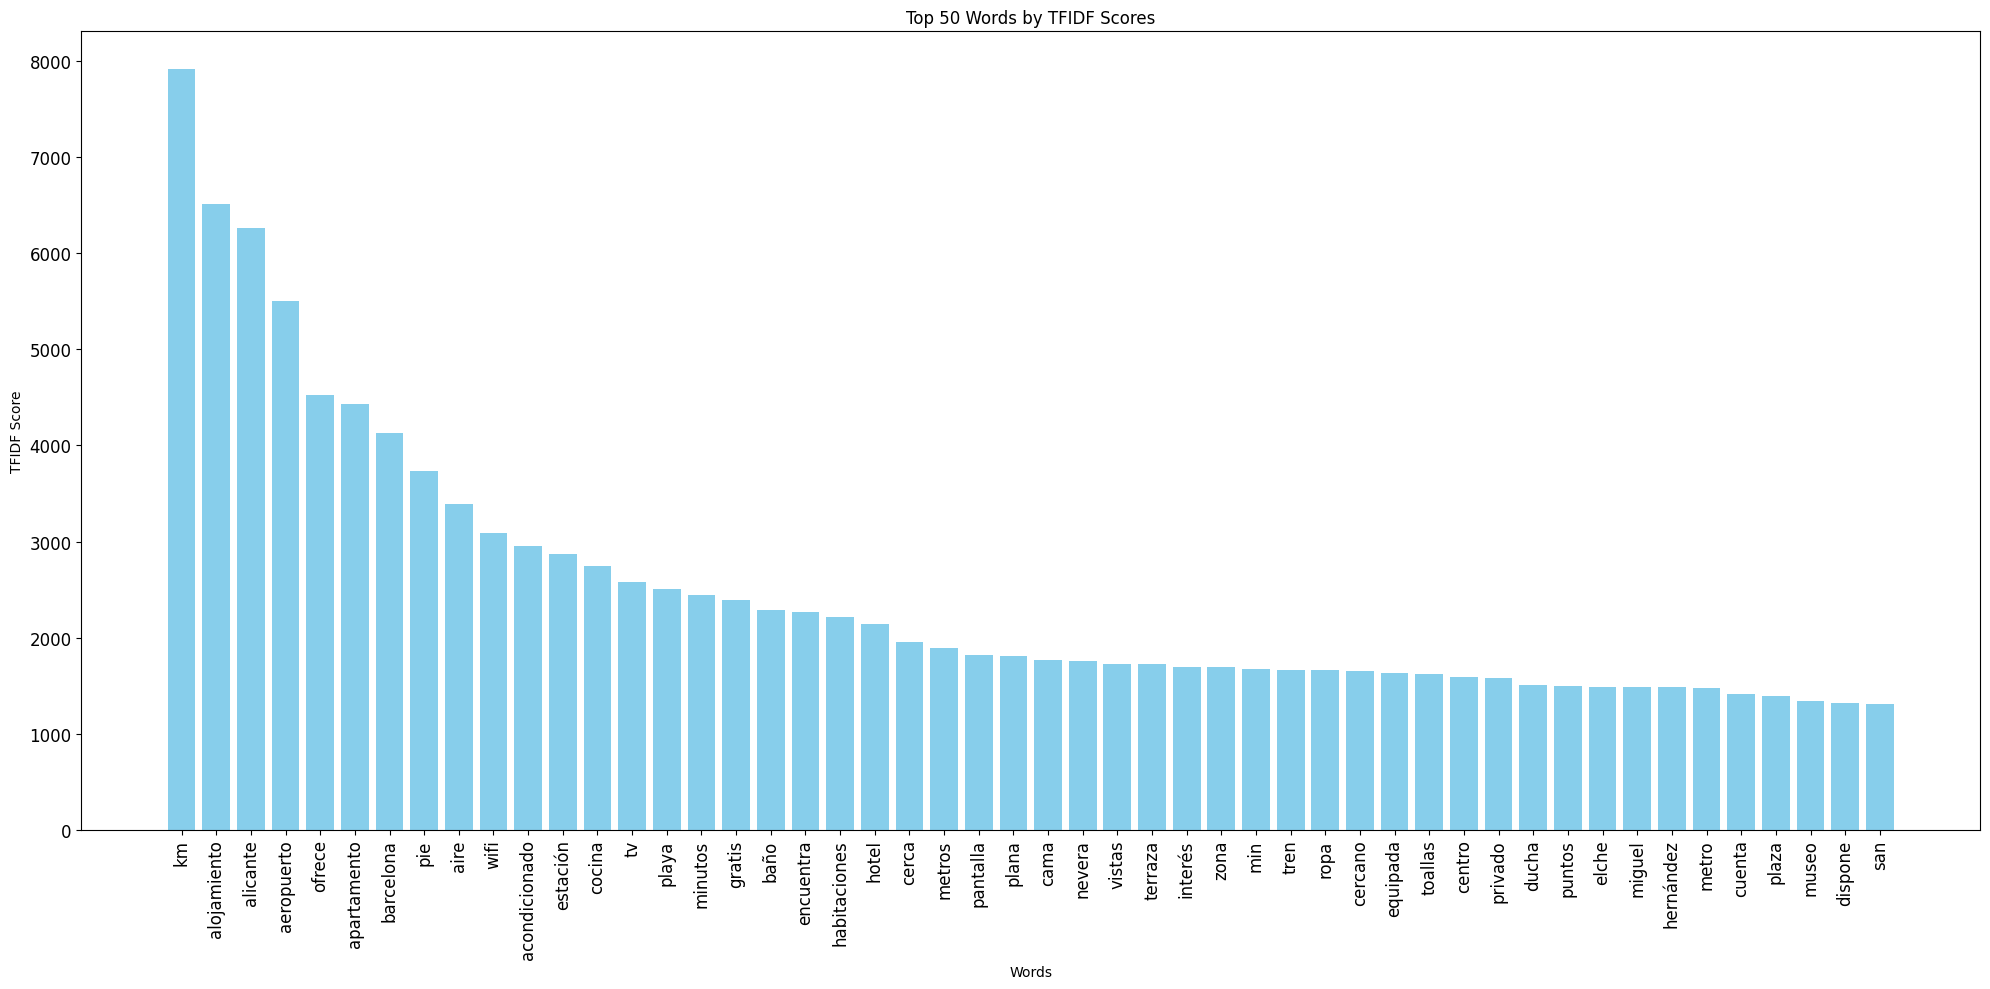

In [21]:
#Now we plot the top words by their score

import matplotlib.pyplot as plt
import pandas as pd

top_50_freq_df = words_freq_df[:50]

# Proceed to plot
plt.figure(figsize=(20, 10))  # Adjust figure size for better visibility
plt.bar(top_50_freq_df[0], top_50_freq_df[1], color='skyblue')

plt.ylabel('TFIDF Score')
plt.xlabel('Words')
plt.title('Top 50 Words by TFIDF Scores')

# Rotate the x labels to fit them better and set font size to small
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()

In [24]:
top_500_words_freqdf = pd.DataFrame(top_500_words_docfreq)

words_frequencies = top_500_words_freqdf[0]

words_frequencies.to_csv('wordiewordsss')

In [25]:
amenities_freq = amenities_related_words = [
    "wifi",
    "aire acondicionado",
    "cocina",
    "tv",
    "playa",
    "gratis",
    "baño",
    "habitaciones",
    "pantalla plana",
    "cama",
    "nevera",
    "vistas",
    "terraza",
    "toallas",
    "ducha",
    "museo",
    "piscina",
    "golf",
    "recepción",
    "microondas",
    "lavavajillas",
    "horno",
    "restaurante",
    "desayuno",
    "comedor",
    "parking",
    "gimnasio",
    "spa",
    "sauna",
    "cafetera",
    "secador pelo",
    "jardín",
    "servicio",
    "lavadora",
    "sala",
    "satélite",
    "bar",
    "minibar",
    "cafetería",
    "cable",
    "bicicletas",
    "hidromasaje",
    "solárium",
    "tostadora",
]


location_freq = location_related_words = [
    "alicante",
    "aeropuerto",
    "barcelona",
    "playa",
    "estación",
    "centro",
    "elche",
    "ciudad",
    "museo",
    "sagrada",
    "familia",
    "catedral",
    "parque",
    "mercado",
    "eixample",
    "montjuïc",
    "puerto",
    "palacio",
    "gótico",
    "ramblas",
    "explanada",
    "gracia",
    "passeig",
    "pedrera",
    "batlló",
    "diagonal",
    "casa",
    "plaza",
    "san",
    "sants",
    "camp",
    "nou",
    "parc",
    "güell",
    "postiguet",
    "terra",
    "mítica",
    "boquería",
    "plaça",
    "catalunya",
    "gràcia",
    "barceloneta",
    "port",
    "vila",
    "olímpica",
    "llevant",
    "poblenou",
    "somorrostro",
    "montjuic",
    "barri",
    "gòtic",
    "born",
    "raval",
]


amenities = amenities_itfdf + amenities_freq
location = location_itfdf + location_freq

Now we count the number of occurances of the words in 'amenities' and the words in 'location' in each hotel's description and add them to two new columns.

In [26]:
data['amenities'] = 0
data['location'] = 0

def amenities_count(description):
    # Lowercase the description to improve matching
    description_lower = description.lower()
    # Sum the occurrences of each amenity word in the description
    return sum(description_lower.count(amenity.lower()) for amenity in amenities)

# Apply the corrected function to each row in the 'Descriptions' column
data['amenities'] = data['Descriptions'].apply(amenities_count)

def location_count(description):
    # Lowercase the description to improve matching
    description_lower = description.lower()
    # Sum the occurrences of each amenity word in the description
    return sum(description_lower.count(location.lower()) for location in location)

# Apply the corrected function to each row in the 'Descriptions' column
data['location'] = data['Descriptions'].apply(location_count)


In [27]:
data

,Unnamed: 0,Hotel Name,Rating,Price,Hotel URL,Descriptions,Treatment_City,Treatment_Period,language,Description,amenities,location
0,0,Room Mate Gerard,"8,8",€ 987,https://www.booking.com/hotel/es/room-mate-ger...,El Room Mate Gerard en Barcelona ofrece alojam...,1,0,es,El Room Mate Gerard en Barcelona ofrece alojam...,34,10
1,1,Hotel Arts Barcelona,"8,4",€ 3.037,https://www.booking.com/hotel/es/arts-barcelon...,Este hotel de diseño tiene vistas a la playa d...,1,0,es,Este hotel de diseño tiene vistas a la playa d...,48,12
2,2,Hostal la Palmera,"8,6",€ 455,https://www.booking.com/hotel/es/hostal-la-pal...,"Este hostal, de ambiente tranquilo, está situa...",1,0,es,"Este hostal, de ambiente tranquilo, está situa...",30,18
3,3,Hotel Sansi Barcelona,"8,0",€ 702,https://www.booking.com/hotel/es/sansi-barcelo...,Hotel Sansi Barcelona está muy bien situado en...,1,0,es,Hotel Sansi Barcelona está muy bien situado en...,28,22
4,4,Hotel Alimara,"8,3",€ 454,https://www.booking.com/hotel/es/hotelalimara....,El Hotel Alimara es moderno y está ubicado en ...,1,0,es,El Hotel Alimara es moderno y está ubicado en ...,31,9
...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,"6,2",€ 1.440,https://www.booking.com/hotel/es/otlichnaia-ui...,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,0,1,es,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,23,14
872,872,Large rural house with pool and barbecue,"8,0",€ 2.742,https://www.booking.com/hotel/es/large-rural-h...,Large rural house with pool and barbecue tiene...,0,1,es,Large rural house with pool and barbecue tiene...,27,10
873,873,The Market Hostel,"8,6",€ 193,https://www.booking.com/hotel/es/the-market-ho...,The Market Hostel está a menos de 1 km de Play...,0,1,es,The Market Hostel está a menos de 1 km de Play...,20,15
874,874,Victoria Hospedaje,"9,0",€ 280,https://www.booking.com/hotel/es/victoria-alic...,"Victoria Hospedaje se encuentra en Alicante, c...",0,1,es,"Victoria Hospedaje se encuentra en Alicante, c...",9,16


Now we have to adjust the ratings and price columns. The ratings have commas for decimal points, and the prices have euro signs and points separating thousands from hundreds digits. We also impute missing ratings using KNN.  

In [28]:
#First we need to convert the comma to a dot:

data['Rating'] = data['Rating'].str.replace(',', '.').astype(float)

#And convert price to a float:

data['Price'] = data['Price'].str.replace('€', '').str.replace('.', '').astype(float)


#Now we impute NAs:

from sklearn.impute import KNNImputer

data_for_imputation = data[['Rating']]

imputer = KNNImputer(n_neighbors=10)

data_imputed = imputer.fit_transform(data_for_imputation)

data['Rating'] = data_imputed[:, 0]

<ipython-input-28-eb6fad7034b0>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('€', '').str.replace('.', '').astype(float)


In [29]:
data

,Unnamed: 0,Hotel Name,Rating,Price,Hotel URL,Descriptions,Treatment_City,Treatment_Period,language,Description,amenities,location
0,0,Room Mate Gerard,8.8,987.0,https://www.booking.com/hotel/es/room-mate-ger...,El Room Mate Gerard en Barcelona ofrece alojam...,1,0,es,El Room Mate Gerard en Barcelona ofrece alojam...,34,10
1,1,Hotel Arts Barcelona,8.4,3037.0,https://www.booking.com/hotel/es/arts-barcelon...,Este hotel de diseño tiene vistas a la playa d...,1,0,es,Este hotel de diseño tiene vistas a la playa d...,48,12
2,2,Hostal la Palmera,8.6,455.0,https://www.booking.com/hotel/es/hostal-la-pal...,"Este hostal, de ambiente tranquilo, está situa...",1,0,es,"Este hostal, de ambiente tranquilo, está situa...",30,18
3,3,Hotel Sansi Barcelona,8.0,702.0,https://www.booking.com/hotel/es/sansi-barcelo...,Hotel Sansi Barcelona está muy bien situado en...,1,0,es,Hotel Sansi Barcelona está muy bien situado en...,28,22
4,4,Hotel Alimara,8.3,454.0,https://www.booking.com/hotel/es/hotelalimara....,El Hotel Alimara es moderno y está ubicado en ...,1,0,es,El Hotel Alimara es moderno y está ubicado en ...,31,9
...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,6.2,1440.0,https://www.booking.com/hotel/es/otlichnaia-ui...,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,0,1,es,COZY ROOM GUAPO-ALICANTE Nearby The Beach and ...,23,14
872,872,Large rural house with pool and barbecue,8.0,2742.0,https://www.booking.com/hotel/es/large-rural-h...,Large rural house with pool and barbecue tiene...,0,1,es,Large rural house with pool and barbecue tiene...,27,10
873,873,The Market Hostel,8.6,193.0,https://www.booking.com/hotel/es/the-market-ho...,The Market Hostel está a menos de 1 km de Play...,0,1,es,The Market Hostel está a menos de 1 km de Play...,20,15
874,874,Victoria Hospedaje,9.0,280.0,https://www.booking.com/hotel/es/victoria-alic...,"Victoria Hospedaje se encuentra en Alicante, c...",0,1,es,"Victoria Hospedaje se encuentra en Alicante, c...",9,16


Because we are going to control for rating as well in the regression, we wanted to check how well the text controls correlate with rating to ensure we are not controlling for the same thing twice. We find that there is a very weak, but statistically significant correlation between amenities with rating. This is to be expected given many more factors make up rating than just amenities, but also means we are likely controlling more information by including the two textual controls than if we just controlled by rating.

In [30]:
#how do these words correlate with ratings?

# Importing the necessary library for regression
import statsmodels.api as sm

data['Rating'] = pd.to_numeric(data['Rating'])

# Define the independent variables (X) and the dependent variable (y)
X = data[['amenities', 'location']]  # Independent variables
y = data['Rating']  # Assuming the correct column name is 'Rating'; adjust if it's 'ratings'

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.57e-54
Time:                        16:19:53   Log-Likelihood:                -5279.2
No. Observations:                3769   AIC:                         1.056e+04
Df Residuals:                    3766   BIC:                         1.058e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3218      0.078     93.599      0.000       7.168       7.475
amenities      0.0290      0.002     15.841      0.000       0.025       0.033
location       0.0041      0.004      1.036      0.300      -0.004       0.012
==============================================================================
Omnibus:                     1566.680   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11826.210
Skew:                          -1.799   Prob(JB):                         0.00
Kurtosis:                      10.897   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we fit the regression across both cities including an interaction term. We find that the treatment city effect is significant, but the treatment period is not. There is an interaction effect between the city and period, which means one of the cities may exhibit a price change during the treatment week but the other does not. To test this, we run the regression separately for each city.

In [31]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame
data['Rating'] = data['Rating'].astype(float)  # Convert Rating to float

data['Treatment_Interaction'] = data['Treatment_City'] * data['Treatment_Period']

import statsmodels.api as sm

X = data[['Treatment_Period', 'Treatment_City', 'Treatment_Interaction', 'Rating', 'amenities', 'location']]
X = sm.add_constant(X)

y = data['Price']  # Making sure 'Price' is of float type for the regression

# Running the regression
model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          5.77e-181
Time:                        16:21:17   Log-Likelihood:                -30053.
No. Observations:                3769   AIC:                         6.012e+04
Df Residuals:                    3762   BIC:                         6.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    77.70

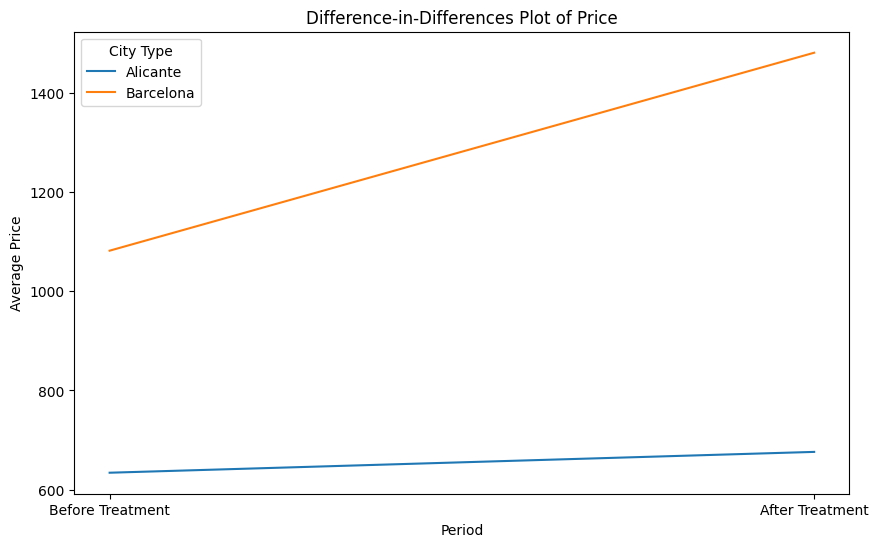

In [32]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has been processed as before

# Calculate the averages again if needed
grouped = data.groupby(['Treatment_City', 'Treatment_Period'])['Price'].mean().unstack()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
# Assuming Treatment_City has identifiable names for cities, use them directly in the plot
# For demonstration, let's manually specify the city names for legend if they are coded as 0 and 1
city_names = {0: 'Alicante', 1: 'Barcelona'}  # Update these based on your data

# Plot each group with a loop to manually control colors, markers, etc.
for city_code, group_data in grouped.iterrows():
    group_data.plot(ax=ax, label=city_names.get(city_code, f'City {city_code}'))

ax.set_title('Difference-in-Differences Plot of Price')
ax.set_ylabel('Average Price')
ax.set_xlabel('Period')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Before Treatment', 'After Treatment'], rotation=0)

# Add legend
ax.legend(title="City Type")

plt.show()


Treatment period is indeed significant for Barcelona hotel prices. The price is significantly higher during the treatment period when the event occurs. The location control was also significant, implying that the price change is not constant in hotels across the city, and the rating control is significant, implying the change in price is greater at either higher or lower end hotels.  

In [33]:
data_barcelona = data[data['Treatment_City'] == 1]
data_alicante = data[data['Treatment_City'] == 0]

#Running the regression again for Barcelona:

X_barcelona = data_barcelona[['Treatment_Period', 'Rating', 'amenities', 'location']]
X_barcelona = sm.add_constant(X_barcelona)

y_barcelona = data_barcelona['Price']

model = sm.OLS(y_barcelona, X_barcelona).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     34.15
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.33e-27
Time:                        16:21:33   Log-Likelihood:                -16375.
No. Observations:                2004   AIC:                         3.276e+04
Df Residuals:                    1999   BIC:                         3.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              294.6204    180.208  

The treatment effect is also significant for Alicante, albeit with a far smaller effect size. It is odd that the treatment period was not significant when averaged across the two cities, but this can happen, especially when the sample sizes are dissimilar. There may be a factor influencing hotel prices across Spain (or a region of it), and then another factor influencing just Barcelona hotel prices. There are likely many factors that influence hotel prices, especially in a large city like Barcelona, so this result is reasonable.

In [34]:
#Running the regression again for Alicante:

X_alicante = data_alicante[['Treatment_Period', 'Rating', 'amenities', 'location']]
X_alicante = sm.add_constant(X_alicante)

y_alicante = data_alicante['Price']

model = sm.OLS(y_alicante, X_alicante).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     31.51
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.20e-25
Time:                        16:21:38   Log-Likelihood:                -13319.
No. Observations:                1765   AIC:                         2.665e+04
Df Residuals:                    1760   BIC:                         2.667e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              360.8092    102.577  

# Q8:

Fixed effects would mean controlling for all unobserved features of the hotels that are constant over time. This would counteract any heterogeneity between hotels that could moderate the effect of the treatment on prices. The hotels become many observations of the same variable, varying only by city and time period (the independent variables of interest), so we can be sure that any observed effect is explained completely by these variables. By controlling for rating, amenities, and location, we have reduced at least a portion of the heterogeneity between hotels, so the significant effect we observed is unlikely to be affected by the quality of the hotel or its location.